# NHL Player Point Predictions #
This notebook will delve into the steps we took to make predictions on NHL player point totals.

Project Definition:
Want to take three consecutive years of advanced hockey stats as attributes and predict a players fourth year point total. 

We have created files within our repository with functions to help structure the project. We will call these functions regularly throughout the notebook. 

We will now import the required libraries and files:

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
datacleaning = __import__('data-cleaning')
datavisualize = __import__('data-visualize')

# Data Analysis #
We first wanted to spend time understanding our data, cleaning it and restructuring it. We will do this mainly with pandas to manipulate the dataframe and seaborn to help visualize with plots and graphs.

In [2]:
# load the dataframe using the getdata() function. Display information about the dataset 
# - size, shape, description, attributes, numerical data, etc
O7to10_data = pd.read_csv('Pre_Project_Files/4_year_stints/07-10.csv')
info = O7to10_data.info(None)
print(info)
describe = O7to10_data.describe()
print(describe)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 44 columns):
Player      3102 non-null object
Season      3102 non-null object
Team        3102 non-null object
Position    3102 non-null object
GP          3102 non-null int64
TOI         3102 non-null float64
G           3102 non-null int64
A           3102 non-null int64
P           3102 non-null int64
P1          3102 non-null int64
P/60        3102 non-null float64
P1/60       3102 non-null float64
GS          3102 non-null float64
GS/60       3102 non-null float64
CF          3102 non-null int64
CA          3102 non-null int64
C+/-        3102 non-null int64
CF%         3102 non-null float64
Rel CF%     3102 non-null float64
GF          3102 non-null int64
GA          3102 non-null int64
G+/-        3102 non-null int64
GF%         3100 non-null float64
Rel GF%     3100 non-null float64
xGF         3102 non-null float64
xGA         3102 non-null float64
xG+/-       3102 non-null float64
x

In [3]:
# Do some playing around with the data set, discover null values, outliers, normalize data, etc.
null_values = pd.isnull(O7to10_data)
null_values


,Player,Season,Team,Position,GP,TOI,G,A,P,P1,...,ixGF,ixGF/60,iSh%,PDO,ZSR,TOI%,TOI% QoT,CF% QoT,TOI% QoC,CF% QoC
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The function pd.isnull was used to identify any null values in the data. In this case, the data set does not contain any null values and the use of this functions is somewhat irrelevant

In [4]:
num_col = datacleaning.get_col_with_no_nan(O7to10_data, 'num')
O7to10_num_data = O7to10_data[num_col]
O7to10_num_data

,GP,TOI,G,A,P,P1,P/60,P1/60,GS,GS/60,...,iCF,iCF/60,ixGF,ixGF/60,iSh%,PDO,ZSR,TOI%,TOI% QoC,CF% QoC
0,56,253.35,0,2,2,2,0.47,0.47,0.92,0.22,...,22,5.21,0.94,0.22,0.00,99.80,81.97,10.37,27.06,48.87
1,19,142.23,0,2,2,0,0.84,0.00,1.64,0.69,...,25,10.55,0.84,0.35,0.00,97.67,48.05,16.25,28.06,50.72
2,30,333.07,0,1,1,0,0.18,0.00,1.12,0.20,...,33,5.94,0.67,0.12,0.00,103.30,51.55,25.42,28.57,48.82
3,38,440.84,2,4,6,3,0.82,0.41,9.27,1.26,...,53,7.21,1.13,0.15,8.70,106.63,51.11,26.71,28.60,50.11
4,41,538.09,2,4,6,5,0.67,0.56,1.98,0.22,...,70,7.81,1.55,0.17,6.90,98.44,44.85,28.86,28.36,49.28
5,5,64.25,0,0,0,0,0.00,0.00,1.32,1.23,...,8,7.47,0.31,0.29,0.00,103.23,51.85,26.55,27.65,49.07
6,57,783.38,1,6,7,2,0.54,0.15,2.17,0.17,...,62,4.75,1.41,0.11,4.00,100.36,40.52,32.30,28.66,49.99
7,17,251.49,1,1,2,1,0.48,0.24,1.77,0.42,...,27,6.44,0.55,0.13,7.69,97.02,40.19,33.60,28.24,51.39
8,8,109.90,0,1,1,1,0.55,0.55,2.70,1.47,...,13,7.10,0.26,0.14,0.00,98.81,74.14,27.88,28.59,50.35
9,49,644.38,0,4,4,1,0.37,0.09,5.88,0.55,...,102,9.50,1.59,0.15,0.00,97.48,42.90,29.43,28.82,49.45


Generted a dataframe which contains strictly the numerical data from the previous O7to10_data dataframe

In [5]:
outliers = datacleaning.detect_outliers(O7to10_num_data)
O7to10_outlier_data = O7to10_num_data.drop(index=outliers)
O7to10_outlier_data

,GP,TOI,G,A,P,P1,P/60,P1/60,GS,GS/60,...,iCF,iCF/60,ixGF,ixGF/60,iSh%,PDO,ZSR,TOI%,TOI% QoC,CF% QoC
1,19,142.23,0,2,2,0,0.84,0.00,1.64,0.69,...,25,10.55,0.84,0.35,0.00,97.67,48.05,16.25,28.06,50.72
2,30,333.07,0,1,1,0,0.18,0.00,1.12,0.20,...,33,5.94,0.67,0.12,0.00,103.30,51.55,25.42,28.57,48.82
4,41,538.09,2,4,6,5,0.67,0.56,1.98,0.22,...,70,7.81,1.55,0.17,6.90,98.44,44.85,28.86,28.36,49.28
6,57,783.38,1,6,7,2,0.54,0.15,2.17,0.17,...,62,4.75,1.41,0.11,4.00,100.36,40.52,32.30,28.66,49.99
9,49,644.38,0,4,4,1,0.37,0.09,5.88,0.55,...,102,9.50,1.59,0.15,0.00,97.48,42.90,29.43,28.82,49.45
10,56,819.10,0,1,1,1,0.07,0.07,4.08,0.30,...,96,7.03,2.25,0.16,0.00,100.80,44.76,31.38,28.80,49.43
16,23,294.87,1,0,1,1,0.20,0.20,3.48,0.71,...,33,6.71,0.65,0.13,9.09,100.00,47.30,33.60,29.43,50.09
17,64,991.48,2,4,6,3,0.36,0.18,9.35,0.57,...,107,6.48,1.69,0.10,4.76,101.28,44.90,33.81,29.45,49.57
18,76,1087.61,1,9,10,2,0.55,0.11,4.55,0.25,...,102,5.63,1.50,0.08,2.94,97.95,49.54,31.64,28.76,49.28
20,66,468.00,6,3,9,8,1.15,1.03,15.58,2.00,...,94,12.05,6.28,0.81,8.11,100.96,56.15,16.11,27.69,49.53


Generated a new dataframe that excludes outliers

In [6]:
O7to10_zscore_data = datacleaning.normalize(O7to10_num_data, 'zscore')
O7to10_zscore_data

,GP,TOI,G,A,P,P1,P/60,P1/60,GS,GS/60,...,iCF,iCF/60,ixGF,ixGF/60,iSh%,PDO,ZSR,TOI%,TOI% QoC,CF% QoC
0,0.001519,-1.189943,-0.984422,-0.962642,-1.048461,-0.897538,-1.015404,-0.657589,-1.004469,-1.062981,...,-1.249480,-1.450076,-0.998706,-0.876703,-1.282846,0.062405,4.332874,-2.577356,-2.565113,-1.706691
1,-1.514470,-1.481566,-0.984422,-0.962642,-1.048461,-1.107918,-0.475910,-1.457774,-0.957400,-0.577186,...,-1.213182,0.019051,-1.022334,-0.365306,-1.282846,-0.617864,-0.338817,-1.652698,-1.134863,1.740656
2,-1.063770,-0.980726,-0.984422,-1.099973,-1.132635,-1.107918,-1.438251,-1.457774,-0.991394,-1.083653,...,-1.116390,-1.249240,-1.062501,-1.270085,-1.282846,1.180217,0.143227,-0.210671,-0.405436,-1.799862
3,-0.735989,-0.697895,-0.622912,-0.687981,-0.711764,-0.792348,-0.505072,-0.759740,-0.458606,0.011969,...,-0.874408,-0.899841,-0.953814,-1.152071,0.277145,2.243735,0.082627,-0.007812,-0.362528,0.603963
4,-0.613071,-0.442672,-0.622912,-0.687981,-0.711764,-0.581969,-0.723786,-0.504362,-0.935173,-1.062981,...,-0.668723,-0.734771,-0.854579,-1.073394,-0.045612,-0.371945,-0.779542,0.330286,-0.705788,-0.942684
5,-2.088087,-1.686217,-0.984422,-1.237304,-1.216809,-1.107918,-1.700707,-1.457774,-0.978319,-0.019039,...,-1.418867,-0.828311,-1.147559,-0.601335,-1.282846,1.157861,0.184545,-0.032973,-1.721265,-1.334005
6,0.042492,0.201066,-0.803667,-0.413320,-0.627589,-0.897538,-0.913338,-1.202396,-0.922753,-1.114661,...,-0.765516,-1.576630,-0.887657,-1.309424,-0.565609,0.241255,-1.375899,0.871243,-0.276713,0.380351
7,-1.596415,-1.194824,-0.803667,-1.099973,-1.048461,-1.002728,-1.000823,-1.049169,-0.948902,-0.856260,...,-1.188984,-1.111681,-1.090854,-1.230747,0.096043,-0.825457,-1.421349,1.075674,-0.877418,2.989154
8,-1.965169,-1.566413,-0.984422,-1.099973,-1.132635,-1.002728,-0.898757,-0.521387,-0.888105,0.229026,...,-1.358372,-0.930104,-1.159373,-1.191409,-1.282846,-0.253776,3.254474,0.176176,-0.376831,1.051186
9,-0.285290,-0.163725,-0.984422,-0.687981,-0.880112,-1.002728,-1.161214,-1.304547,-0.680220,-0.721891,...,-0.281552,-0.269822,-0.845128,-1.152071,-1.282846,-0.678545,-1.048109,0.419921,-0.047873,-0.625901


Used z-score method to normalize the data

In [7]:
O7to10_minmax_data = datacleaning.normalize(O7to10_num_data, 'minmax')
O7to10_minmax_data

C:\Users\aserg\Desktop\GIT_QMIND\Nhl-Player-Point-Predictions\data-cleaning.py:85: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  minmax_data = minmax_scale(cleaner_data)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.658228,0.127321,0.000000,0.038462,0.028169,0.035714,0.104677,0.104677,0.126356,0.342342,...,0.034146,0.140158,0.037082,0.134228,0.0000,0.566212,0.898769,0.130141,0.252066,0.401747
1,0.189873,0.057706,0.000000,0.038462,0.028169,0.000000,0.187082,0.000000,0.133327,0.402831,...,0.039024,0.323600,0.033007,0.221477,0.0000,0.511443,0.429678,0.289232,0.458678,0.671033
2,0.329114,0.177265,0.000000,0.019231,0.014085,0.000000,0.040089,0.000000,0.128292,0.339768,...,0.052033,0.165235,0.026080,0.067114,0.0000,0.656210,0.478080,0.537338,0.564050,0.394469
3,0.430380,0.244781,0.060606,0.076923,0.084507,0.053571,0.182628,0.091314,0.207204,0.476190,...,0.084553,0.208863,0.044825,0.087248,0.0870,0.741836,0.471996,0.572240,0.570248,0.582242
4,0.468354,0.305707,0.060606,0.076923,0.084507,0.089286,0.149220,0.124722,0.136619,0.342342,...,0.112195,0.229474,0.061940,0.100671,0.0690,0.531242,0.385424,0.630411,0.520661,0.461426
5,0.012658,0.008852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130229,0.472329,...,0.011382,0.217795,0.011410,0.181208,0.0000,0.654410,0.482229,0.567911,0.373967,0.430859
6,0.670886,0.459379,0.030303,0.115385,0.098592,0.035714,0.120267,0.033408,0.138459,0.335907,...,0.099187,0.124356,0.056235,0.060403,0.0400,0.580612,0.325543,0.723485,0.582645,0.564774
7,0.164557,0.126156,0.030303,0.019231,0.028169,0.017857,0.106904,0.053452,0.134586,0.368082,...,0.042276,0.182412,0.021190,0.073826,0.0769,0.494729,0.320979,0.758658,0.495868,0.768559
8,0.050633,0.037451,0.000000,0.019231,0.014085,0.017857,0.122494,0.122494,0.143590,0.503218,...,0.019512,0.205084,0.009372,0.080537,0.0000,0.540756,0.790485,0.603896,0.568182,0.617176
9,0.569620,0.372297,0.000000,0.076923,0.056338,0.017857,0.082405,0.020045,0.174380,0.384813,...,0.164228,0.287530,0.063570,0.087248,0.0000,0.506557,0.358457,0.645833,0.615702,0.486172


Used minmax method to normalize the data

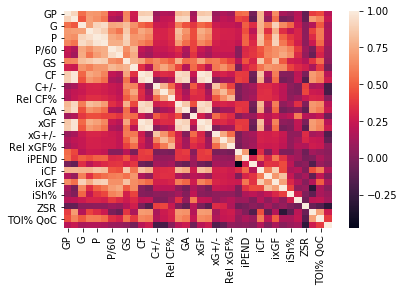

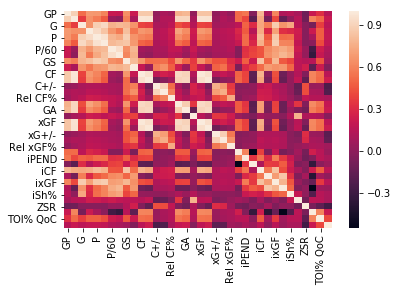

In [8]:
# Make correlation graphs, plots, distributions, any type of cool visualization plots for the data.
corr_num_data = O7to10_num_data.corr()
corr_outlier_data = O7to10_outlier_data.corr()
corr_zscore_data = O7to10_zscore_data.corr()
corr_minmax_data = O7to10_minmax_data.corr()
map1 = sb.heatmap(corr_num_data)
plt.show(map1)
map2 = sb.heatmap(corr_outlier_data)
plt.show(map2)
map4 = sb.heatmap(corr_minmax_data)
plt.show(map4)


Used to pd.corr() function to determine the correlation between the stats for the various datasets. Generated heatmaps to visualize the results. It appears as though the heatmap for the original numerical data and the normalized data are the same, but the correlations differ slightly for when the outliers are removed from the data. (Sidenote: the heatmap for the zscore data correlations was being displayed differently and thus was not included)

In [40]:
# Formalize a few datasets we want to run through some models (all attributes, top ten best correlated, etc.)
# - split into train and test set, target, ready for training

# Model Training and Testing # 
We will look into some different types of models, all of which have seperate properties that may help increase the accuracy of our predictions.

In [13]:
# Initialize some models and talk about the types, lose functions, layers, activation functions, etc

In [14]:
# Train the models with multiple datsets
# Observe the accuracy while training.
# Test models

Observations of the results. Make tweaks and adjustments to the models/datasets

In [15]:
# Tweak models and data, re train, observe and test

In [16]:
# Document fundings, tweak more, pick the best model and train/test another time

# Evaluation of Findings #
In this section we will visualize the results, do an analysis on the models to determine what worked best and what may not have and finish with concluding remarks and waht we learned.

In [17]:
# Visualize the results as best we can, graph prediction vs actual, etc.

In [18]:
# Make a prediction for a few player of point totals for the end of this season?

In [19]:
# Conclude, what did we learn, what worked, what can we improve, etc.